In [42]:
import pandas as pd
import random as rd
import numpy as np
import math as m
import sklearn.cluster as skc
import sklearn.neighbors as skn
from PIL import Image as img
import matplotlib.pyplot as plt


In [43]:
"""
Split the dataset into a training and testing set
D: dataset given as input
percent: the percentage of data used for testing
Return: a tupple containing both the training and testing data
"""
def split(D, percent):
    used = []   # Track indeces used for test set
    test = []   # List of vectors for test set
    train = []  # List of vectors for training set

    # Add random elements into the training set until a threshold
    while len(test) < len(D) * percent:
        i = rd.randint(0, len(D) - 1)
        if i not in used:
            used.append(i)
            test.append(D.iloc[i].values.tolist())

    # Add all remaining elements into the training set
    for i in range(len(D)):
        if i not in used:
            train.append(D.iloc[i].values.tolist())
    return (train, test)

"""
Splits a given data set into features and labels.
IMPORTANT: Assumes data label is the last column of each vector
data: The dataset being split
Returns a list of features and a list of labels associated with each vector
"""
def split_labels(data, last=True):
    features = []
    labels = []
    for i in data:
        if (last):
            features.append(i[:-1])
            labels.append(i[-1])
        else:
            features.append(i[1:])
            labels.append(i[0])
    return features, labels

"""
Prints a confusion matrix with one label per line
conf: the confusion matrix input
key: key dictionary to translate from integer to string labels
"""
def print_conf(conf, key):
    # Print Label header
    for i in range(len(conf)):
        prnt = ""
        for j in range(len(conf[i])):
            prnt += str(conf[i][j]) + ", "
        print(prnt[:-2])

"""
Calculates Eclidian distance of two lists of floats
p1: first vector
p2: second vector
Return: calculated Euclidian distance
"""
def dist_euc(p1, p2):
    dist = 0
    # Compares the length of p1 and p2 and returns an error if uneven
    if len(p1) != len(p2):
        return 0
    else:
        # Iterate over each featur finding (f_p1 - f_p2)^2
        for i in range(len(p1)):
            dist += (p1[i] - p2[i]) ** 2
        # Take the square root of the sum and return
        return m.sqrt(dist)


"""
Calculates Manhattan distance of two lists of floats
p1: first vector
p2: second vector
Return: calculated Manhattan distance
"""
def dist_man(p1, p2):
    dist = 0
    # Compares the length of p1 and p2 and returns an error if uneven
    if len(p1) != len(p2):
        return 0
    else:
        for i in range(len(p1)):
            dist += abs(p1[i] - p2[i])
        return dist


"""
Calculates Cosine similarity of two lists of floats
p1: first vector
p2: second vector
Return: calculated Cosine similarity
"""
def dist_cos(p1, p2):
    dist = 0
    # Compares the length of p1 and p2 and returns an error if uneven
    if len(p1) != len(p2):
        return 0
    else:
        l = len(p1)
        # Takes the dot product of the two vectors
        dot = sum(i[0] * i[1] for i in zip(p1, p2))
        return dot / (dist_euc([0] * l, p1) * dist_euc([0] * l, p2))

def print_mnist(data, row=5, column=2, h=28, w=28):
    plt.figure(figsize=(h, w))
    for i in range(len(data)):
        plt.subplot(column, row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[i], cmap=plt.cm.binary)
    plt.show()

def format_array(data, h=28, w=28):
    ret = []
    for i in range(len(data)):
        row = []
        count = 0
        for j in range(h):
            col = []
            for k in range(w):
                col.append(data[i][count])
                count += 1
            row.append(col)
        ret.append(row)
    return ret

In [3]:
train, test = split(pd.read_csv('iris.csv'), 0.2)

mtrain = np.array(pd.read_csv('mnist_train.csv', header=None).values.tolist())
mtest = np.array(pd.read_csv('mnist_test.csv', header=None).values.tolist())

key_iris = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2,
            0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

key_mnist = {0: "Zero", 1: "One", 2: "Two", 3: "Three", 4: "Four", 5: "Five", 6: "Six", 7: "Seven", 8: "Eight", 9: "Nine",
             "Zero": 0, "One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5, "Six": 6, "Seven": 7, "Eight": 8, "Nine": 9}

In [ ]:
tester=[]


print_mnist(tester)

Problem 6\
Consider the following algorithm. Run it on Iris.tab and Mnist datasets and report your results.\
    1) Divide your data into random train and test sets\
    2) Training: for a specific label, find the average of each feature. (In case of mnist, this is pixel wise).  give your averages. In case of mint, give this as 10 images, one for each label\
    3) For each data point in the training set, find the closest from the average templates. Use Manhattan, Euclidean and Cosine distances (note that higher cosine value means lower distance). Give the point that label. \
    4) Do the same for the test set\
    5) Give the confusion matrix for training and test sets.

In [ ]:
"""
Runs the algoritm needed to complete problem 6 for the iris dataset
train: the training set used in the algorithm
test: the testing set used to validate results
key: a dictionary to convert from text labels to integer representation and back
avg: a dictonary used to keep track of average values for each label in the data
"""
def P6Iris(train, test, key, avg):
    # Separate the data by label and take the average of each
    for row in train:
        # Initialize each label with the first occurrance
        if avg[row[4]] == 0:
            avg[row[4]] = [row[0:4], 1]
        else:
            avg[row[4]][1] += 1
            # Take a rolling average for each feature
            for i in range(len(row) - 1):
                avg[row[4]][0][i] = avg[row[4]][0][i] + (row[i] - avg[row[4]][0][i]) / avg[row[4]][1]

    # Define lists of closest values
    train_vals = []
    test_vals = []
    # Find the closest points to each label using the 3 measurement methods
    for val in avg.values():
        train_vals.append(find_min_dist(val[0], train))
        test_vals.append(find_min_dist(val[0], test))

    # Define confusion matrices
    conf_train = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    conf_test  = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

    # Populate confusion matrices
    for i in range(len(avg)):
        for j in range(len(avg)):
            conf_train[i][key[train_vals[i][j]]] += 1
            conf_test[i][key[test_vals[i][j]]] += 1

    # Print data relavant to the problem
    print(avg)
    print(train_vals)
    print(conf_train)
    print(test_vals)
    print(conf_test)

"""
Finds the minimum distance between an average point and the dataset using
    Euclidian distance, Manhattan distance, and Cosine similarity
avg: the average values for a given label
data: the raw dataset being tested against
Return: a set of points representing minumum distance for each distance measure
"""
def find_min_dist(avg, data):
    # Define maximum possible distances (0 in case of cosine similarity)
    dist = [m.inf, m.inf, 0]
    keys = [[], [], []]
    # Iterate through the dataset and find min distances
    for i in data:
        d = dist_euc(avg, i[:-1])
        if d < dist[0]:
            dist[0] = d
            keys[0] = i[-1]

        d = dist_man(avg, i[:-1])
        if d < dist[1]:
            dist[1] = d
            keys[1] = i[-1]

        d = dist_cos(avg, i[:-1])
        if d > dist[2]:
            dist[2] = d
            keys[2] = i[-1]

    return keys


avg = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}
P6Iris(train, test, key_iris, avg)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
10


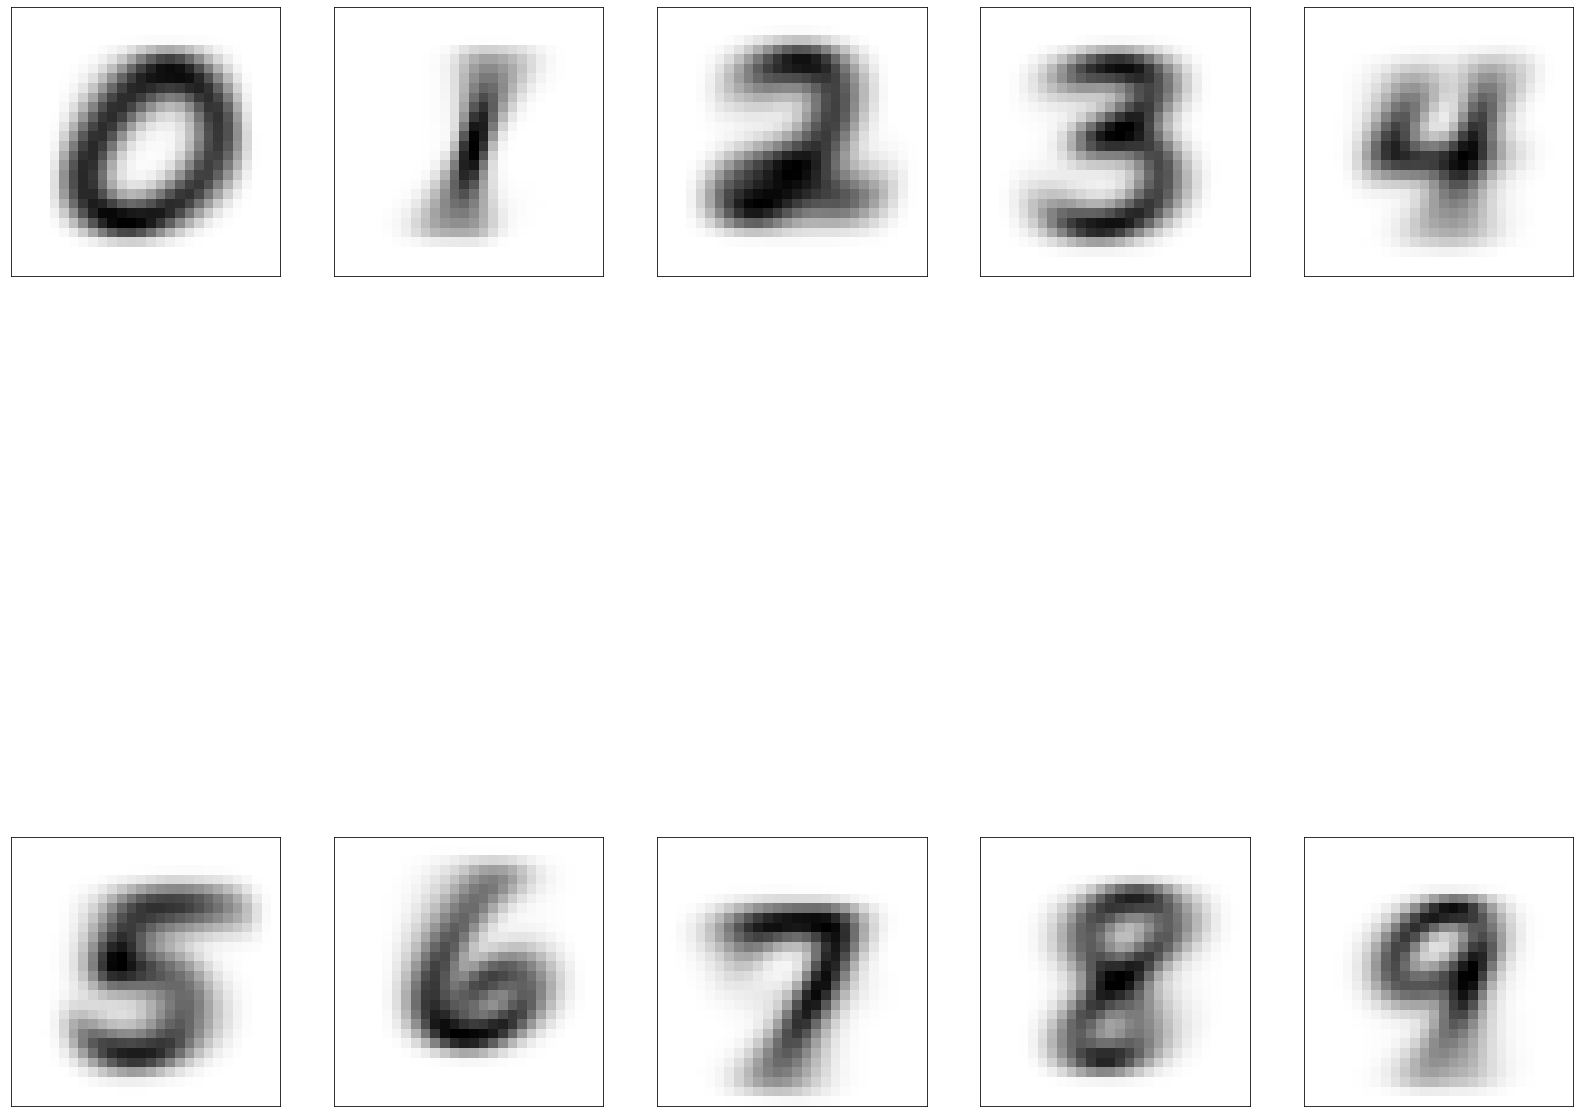


Training Euclidean Matrix
[5134, 4, 51, 26, 16, 402, 169, 23, 83, 15]
[0, 6485, 49, 11, 3, 78, 9, 7, 94, 6]
[98, 359, 4516, 208, 171, 36, 183, 124, 231, 32]
[53, 183, 200, 4721, 12, 365, 48, 64, 328, 157]
[11, 139, 30, 0, 4722, 10, 105, 26, 76, 723]
[95, 435, 32, 713, 147, 3635, 111, 42, 64, 147]
[81, 213, 153, 4, 115, 189, 5137, 0, 26, 0]
[34, 315, 63, 6, 143, 20, 4, 5267, 84, 329]
[48, 355, 76, 554, 65, 212, 48, 22, 4242, 229]
[62, 181, 48, 97, 498, 51, 10, 266, 116, 4620]

Training Manhattan Matrix
[4822, 344, 7, 41, 34, 171, 274, 58, 65, 107]
[0, 6729, 1, 1, 1, 0, 2, 5, 1, 2]
[67, 2520, 2579, 115, 148, 5, 182, 147, 124, 71]
[26, 1994, 40, 3578, 7, 23, 51, 84, 149, 179]
[4, 948, 2, 0, 3884, 0, 60, 35, 3, 906]
[45, 2157, 2, 852, 74, 1627, 119, 74, 48, 423]
[38, 1297, 8, 2, 105, 43, 4411, 6, 4, 4]
[5, 1128, 5, 0, 68, 0, 2, 4873, 3, 181]
[31, 2593, 8, 351, 50, 26, 41, 44, 2316, 391]
[29, 1005, 5, 61, 266, 4, 7, 306, 5, 4261]

Training Cosine Matrix
[5324, 2, 46, 31, 14, 238, 164, 2, 8

In [46]:
#Idea
#Loop once, counting # of each digit
#Make arrays for avg's
#Loop through again, this time storing avg's in the arrays made prior
#Loop one more time. For each thing in the training set, see which avg image it's closest to. Assign it that label
#Repeat above step for test set
#Generate & print confusion

def getActualLabel(digit):
    return digit[0]

def labelFromEuclidean(digit, avgList):
    dist = m.inf
    label = 0
    
    #Go through the average list, find which one we're closest to
    for i in range(10):
        testDigit = avgList[i]
        currentDist = dist_euc(digit[1:], testDigit)
        if currentDist < dist:
            dist = currentDist
            label = i
            
    return label

def labelFromManhattan(digit, avgList):
    dist = m.inf
    label = 0
    
    #Go through the average list, find which one we're closest to
    for i in range(10):
        testDigit = avgList[i]
        currentDist = dist_man(digit[1:], testDigit)
        if currentDist < dist:
            dist = currentDist
            label = i
            
    return label

def labelFromCosine(digit, avgList):
    dist = 0
    label = 0
    
    #Go through the average list, find which one we're closest to
    for i in range(10):
        testDigit = avgList[i]
        currentDist = dist_cos(digit[1:], testDigit)
        if currentDist > dist:
            dist = currentDist
            label = i
            
    return label

def p6MNist():
    #Make a list to count the labels
    labelCounts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    #Read the csv files, make some lists
    mTrain = pd.read_csv("mnist_train.csv", header = None).values.tolist()
    mTest = pd.read_csv("mnist_test.csv", header = None).values.tolist()
    
    #Count the number of each label
    for i in mTrain:
        labelCounts[i[0]] += 1
        
    print(labelCounts)
    
    #Make a list to store the avg digits
    avgLists = []
    
    #Do an iteration for each digit label
    for i in range(10):
        avgDigit = [0 for i in range(28 ** 2)]
        
        #Loop through the list of digits
        for j in mTrain:
            #Skip if it's not the current digit label
            if j[0] != i:
                continue
                
            #Otherwise, compound this digit onto the rolling average
            for k in range(28 ** 2):
                actualIndex = k + 1
                avgDigit[k] += j[actualIndex] / labelCounts[i]
                
        avgLists.append(avgDigit)
        
    print(len(avgLists))
    print_mnist(format_array(avgLists))
        
    #Assign labels to training set based on proximity to avg image
    trainLabelsEuc = []
    trainLabelsMan = []
    trainLabelsCos = []
    
    #Remove [0:9] for full set
    for i in mTrain:
        trainLabelsEuc.append(labelFromEuclidean(i, avgLists))
        trainLabelsMan.append(labelFromManhattan(i, avgLists))
        trainLabelsCos.append(labelFromCosine(i, avgLists))
        
    #Do the same thing for the test set
    testLabelsEuc = []
    testLabelsMan = []
    testLabelsCos = []
    
    #Remove [0:9] for full set
    for i in mTest:
        testLabelsEuc.append(labelFromEuclidean(i, avgLists))
        testLabelsMan.append(labelFromManhattan(i, avgLists))
        testLabelsCos.append(labelFromCosine(i, avgLists))
        
    #Make the confusion matrices
    #For the training euclidean
    trainEConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(trainLabelsEuc)):
        trainEConfusion[getActualLabel(mTrain[i])][trainLabelsEuc[i]] += 1
    #Print the matrix
    print("\nTraining Euclidean Matrix")
    for i in trainEConfusion:
        print(i)
        
    #For the training manhatten
    trainMConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(trainLabelsMan)):
        trainMConfusion[getActualLabel(mTrain[i])][trainLabelsMan[i]] += 1
    #Print the matrix
    print("\nTraining Manhattan Matrix")
    for i in trainMConfusion:
        print(i)
        
    #For the training cosine
    trainCConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(trainLabelsCos)):
        trainCConfusion[getActualLabel(mTrain[i])][trainLabelsCos[i]] += 1
    #Print the matrix
    print("\nTraining Cosine Matrix")
    for i in trainCConfusion:
        print(i)
        
    #For the test euclidean
    testEConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(testLabelsEuc)):
        testEConfusion[getActualLabel(mTest[i])][testLabelsEuc[i]] += 1
    #Print the matrix
    print("\nTesting Euclidean Matrix")
    for i in testEConfusion:
        print(i)
        
    #For the testing manhatten
    testMConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(testLabelsMan)):
        testMConfusion[getActualLabel(mTest[i])][testLabelsMan[i]] += 1
    #Print the matrix
    print("\nTesting Manhattan Matrix")
    for i in testMConfusion:
        print(i)
        
    #For the testing cosine
    testCConfusion = [[0 for i in range(10)] for i in range(10)]
    for i in range(len(testLabelsCos)):
        testCConfusion[getActualLabel(mTest[i])][testLabelsCos[i]] += 1
    #Print the matrix
    print("\nTesting Cosine Matrix")
    for i in testCConfusion:
        print(i)
    
p6MNist()

Problem 7\
Consider the following algorithm. Run it on Iris.tab and Mnist datasets and report your results.\
    1) Divide your data into random train and test sets\
    2) Training: k-means clustering for k=1 to k=15 (i.e., run your algorithm 15 times). DO NOT USE LABLES. Give the centroids. In case of mint, give this as k images, one for each label. (you may use a library function)\
    3) Label a cluster using the majority label found in the cluster. \
    4) For each data point in the test set, find the closest from the centroid Use Manhattan, Euclidean and Cosine distances (note that higher cosine value means lower distance). Give the point that label. \
    5) Give the confusion matrix for training and test sets.\
    6) Form the elbow map - using %correct as a measure. (Test set accuracy)\

In [ ]:
# Finds and returns the index containing the max element of a list
def max_index(lst):
    max = 0
    index = 0
    for i in range(len(lst)):
        if lst[i] > max:
            max = lst[i]
            index = i
    return index

"""
Finds the cluster a given data point belongs to for each distance method
clusters: a list of the centroid of each cluster
data: the vector in need of classification
Return: the labels generated by each distance calculation method
"""
def find_cluster(clusters, data):
    dist = [m.inf, m.inf, 0]    # Define maximum distances
    labels = [0, 0, 0]          # Initalize labels
    # Iterate through clusters to find best fit
    for i in range(len(clusters)):
        d = dist_euc(clusters[i], data[:-1])
        if d < dist[0]:
            dist[0] = d
            labels[0] = i

        d = dist_man(clusters[i], data[:-1])
        if d < dist[1]:
            dist[1] = d
            labels[1] = i

        d = dist_cos(clusters[i], data[:-1])
        if d > dist[2]:
            dist[2] = d
            labels[2] = i

    return labels

"""
Generalized algorithm for problem 7 using the iris dataset
train: training data set
test: testing data set
key: dictionary used to convert to and from string labels
kmin: minimum number of clusters
kmax: maximum number of clusters
"""
def P7Iris(train, test, key, kmin, kmax):
    train_lab = [i[:-1] for i in train] # Remove labels from training data
    # Run k means clustering from k = kmin to k = kmax
    for k in range(kmin, kmax + 1):
        # Tracks the label and number of elements for each cluster
        cluster_count = {}
        kmeans = skc.KMeans(k).fit(train_lab)
        labels = kmeans.labels_
        # Counts the actual labels of each cluster
        for i in range(len(train)):
            if labels[i] not in cluster_count:
                cluster_count[labels[i]] = [0, 0, 0]
            cluster_count[labels[i]][key[train[i][-1]]] += 1
        # Assigns a label to each cluster
        for i in cluster_count.keys():
            cluster_count[i] = (cluster_count[i], key[max_index(cluster_count[i])])
        # print(cluster_count) # Sanity check
    
        # Get cluster centroids
        clusters = kmeans.cluster_centers_

        # Accuracy measures for each distance method for training and test sets
        # [# correct, # Incorrect]
        acc_train = [[0, 0] for i in range(3)]
        acc_test = [[0, 0] for i in range(3)]

        
        # Initialize confusion Matrices
        conf_train = [[[0, 0, 0], [0, 0, 0], [0, 0, 0]] for i in range(3)]
        conf_test  = [[[0, 0, 0], [0, 0, 0], [0, 0, 0]] for i in range(3)]

        # Find the number correct and incorrect for each distance method in training set
        for i in range(len(train)):
            # Find a cluster for an individual element
            lab = find_cluster(clusters, train[i])
            # For each distance method, establish if each was correct or not
            for j in range(len(lab)):
                if train[i][-1] == cluster_count[lab[j]][1]:
                    acc_train[j][0] += 1
                else:
                    acc_train[j][1] += 1
                # Add an entry to the confusion matrix
                conf_train[j][key[train[i][-1]]][key[cluster_count[lab[j]][1]]] += 1

        # Find the number correct and incorrect for each distance method in test set
        for i in range(len(test)):
            # Find a cluster for an individual element
            lab = find_cluster(clusters, test[i])
            # For each distance method, establish if each was correct or not
            for j in range(len(lab)):
                if test[i][-1] == cluster_count[lab[j]][1]:
                    acc_test[j][0] += 1
                else:
                    acc_test[j][1] += 1
                # Add an entry to the confusion matrix
                conf_test[j][key[test[i][-1]]][key[cluster_count[lab[j]][1]]] += 1

        # Print off results in the form of accuracy percentages
        print(f"k = {k}")
        for i in range(3):
            print(f"Right: {acc_train[i][0]}\t Wrong: {acc_train[i][1]}")
            print_conf(conf_train[i], key)
            print(f"Right: {acc_test[i][0]}\t Wrong: {acc_test[i][1]}")
            print_conf(conf_test[i], key)

P7Iris(train, test, key_iris, 4, 4)


In [10]:
# Finds and returns the index containing the max element of a list
def max_index(lst):
    max = 0
    index = 0
    for i in range(len(lst)):
        if lst[i] > max:
            max = lst[i]
            index = i
    return index

"""
Finds the cluster a given data point belongs to for each distance method
clusters: a list of the centroid of each cluster
data: the vector in need of classification
Return: the labels generated by each distance calculation method
"""
def find_cluster(clusters, data):
    dist = [m.inf, m.inf, 0]    # Define maximum distances
    labels = [0, 0, 0]          # Initalize labels
    # Iterate through clusters to find best fit
    for i in range(len(clusters)):
        d = dist_euc(clusters[i], data[:-1])
        if d < dist[0]:
            dist[0] = d
            labels[0] = i

        d = dist_man(clusters[i], data[:-1])
        if d < dist[1]:
            dist[1] = d
            labels[1] = i

        d = dist_cos(clusters[i], data[:-1])
        if d > dist[2]:
            dist[2] = d
            labels[2] = i

    return labels

"""
Generalized algorithm for problem 7 using the iris dataset
train: training data set
test: testing data set
key: dictionary used to convert to and from string labels
kmin: minimum number of clusters
kmax: maximum number of clusters
"""
def P7MNIST(train, test, key, kmin, kmax):
    train_lab = [i[1:] for i in train] # Remove labels from training data
    # Run k means clustering from k = kmin to k = kmax
    for k in range(kmin, kmax + 1):
        # Tracks the label and number of elements for each cluster
        cluster_count = {}
        kmeans = skc.KMeans(k).fit(train_lab)
        labels = kmeans.labels_
        # Counts the actual labels of each cluster
        for i in range(len(train)):
            if labels[i] not in cluster_count:
                cluster_count[labels[i]] = [0 for i in range(10)]
            cluster_count[labels[i]][train[i][0]] += 1
        # Assigns a label to each cluster
        for i in cluster_count.keys():
            cluster_count[i] = (cluster_count[i], max_index(cluster_count[i]))
        # print(cluster_count) # Sanity check
    
        # Get cluster centroids
        clusters = kmeans.cluster_centers_
        print_mnist(format_array(clusters))

        # Accuracy measures for each distance method for training and test sets
        # [# correct, # Incorrect]
        acc_train = [[0, 0] for i in range(3)]
        acc_test = [[0, 0] for i in range(3)]

        
        # Initialize confusion Matrices
        conf_train = [[[0 for i in range(10)] for i in range(10)] for i in range(3)]
        conf_test = [[[0 for i in range(10)] for i in range(10)] for i in range(3)]

        # Find the number correct and incorrect for each distance method in training set
        for i in range(len(train)):
            # Find a cluster for an individual element
            lab = find_cluster(clusters, train[i])
            # For each distance method, establish if each was correct or not
            for j in range(len(lab)):
                if train[i][-1] == cluster_count[lab[j]][1]:
                    acc_train[j][0] += 1
                else:
                    acc_train[j][1] += 1
                # Add an entry to the confusion matrix
                conf_train[j][train[i][-1]][cluster_count[lab[j]][1]] += 1

        # Find the number correct and incorrect for each distance method in test set
        for i in range(len(test)):
            # Find a cluster for an individual element
            lab = find_cluster(clusters, test[i])
            # For each distance method, establish if each was correct or not
            for j in range(len(lab)):
                if test[i][-1] == cluster_count[lab[j]][1]:
                    acc_test[j][0] += 1
                else:
                    acc_test[j][1] += 1
                # Add an entry to the confusion matrix
                conf_test[j][test[i][-1]][cluster_count[lab[j]][1]] += 1

        # Print off results in the form of accuracy percentages
        print(f"k = {k}")
        for i in range(3):
            print(f"Right: {acc_train[i][0]}\t Wrong: {acc_train[i][1]}")
            print_conf(conf_train[i], key)
            print(f"Right: {acc_test[i][0]}\t Wrong: {acc_test[i][1]}")
            print_conf(conf_test[i], key)

P7MNIST(mtrain[:100], mtest[:20], key_mnist, 10, 10)


k = 10
Right: 15	 Wrong: 85
15, 26, 5, 8, 13, 0, 11, 0, 7, 15
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Right: 5	 Wrong: 15
5, 6, 0, 0, 8, 0, 0, 0, 0, 1
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Right: 14	 Wrong: 86
14, 29, 5, 8, 10, 0, 11, 0, 8, 15
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Right: 3	 Wrong: 17
3, 8, 0, 0, 8, 0, 0, 0, 0, 1
0,

Problem 8\
Consider the following algorithm. Run it on Iris.tab and Mnist datasets and report your results.\
    1) Divide your data into random train and test sets\
    2) Using kNN with Manhattan, Euclidean and cosine distances classify the training and test sets. Do this for k=1, k=5, k=10. (you may use a library function)\
    3) Give the confusion matrix for training and test sets.\
    4) Form the elbow map - using %correct as a measure. (Test set accuracy)

In [ ]:
"""
Algorithm used to complete problem 8 of HW1 with the iris.tab dataset
train: matrix of training data vectors
test: matrix of testing data vectors
key: Key necessary to translate between string and int label representation
k: number of neighbors for the KNN classifier
"""
def P8Iris(train, test, key, k):
    # Split the training and testing sets into features and labels
    train_features, train_labels = split_labels(train)
    test_features, test_labels = split_labels(test)
    
    # Initialize KNN Classifiers for each distance metric
    knn = []
    knn.append(skn.KNeighborsClassifier(n_neighbors=k, metric="euclidean"))
    knn.append(skn.KNeighborsClassifier(n_neighbors=k, metric="cityblock"))
    knn.append(skn.KNeighborsClassifier(n_neighbors=k, metric="cosine"))

    # Initialize confusion matrices for training and testing across metrics
    conf_train = [[[0, 0, 0], [0, 0, 0], [0, 0, 0]] for i in range(3)]
    conf_test = [[[0, 0, 0], [0, 0, 0], [0, 0, 0]] for i in range(3)]

    # For each metric, generate confustion matrix and print accuracy
    for i in range(3):
        # Train the model on training data
        knn[i].fit(train_features, train_labels)

        # Generate prediction data for the training set
        pred_labels = knn[i].predict(train_features)
        # Build confusion matrix for training set
        for j in range(len(train_labels)):
            conf_train[i][key[train_labels[j]]][key[pred_labels[j]]] += 1

        # Generate prediction data for the test set
        pred_labels = knn[i].predict(test_features)
        # Build confusion matrix for test set
        for j in range(len(test_labels)):
            conf_test[i][key[test_labels[j]]][key[pred_labels[j]]] += 1

        # Print out the training and testing confusion matrices
        print_conf(conf_train[i], key)
        print()
        print_conf(conf_test[i], key)

        # Print out % accuracy data
        print("{:.1f}\n".format(knn[i].score(test_features, test_labels) * 100))


P8Iris(train, test, key_iris, 1)
P8Iris(train, test, key_iris, 5)
P8Iris(train, test, key_iris, 10)